# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")
df.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


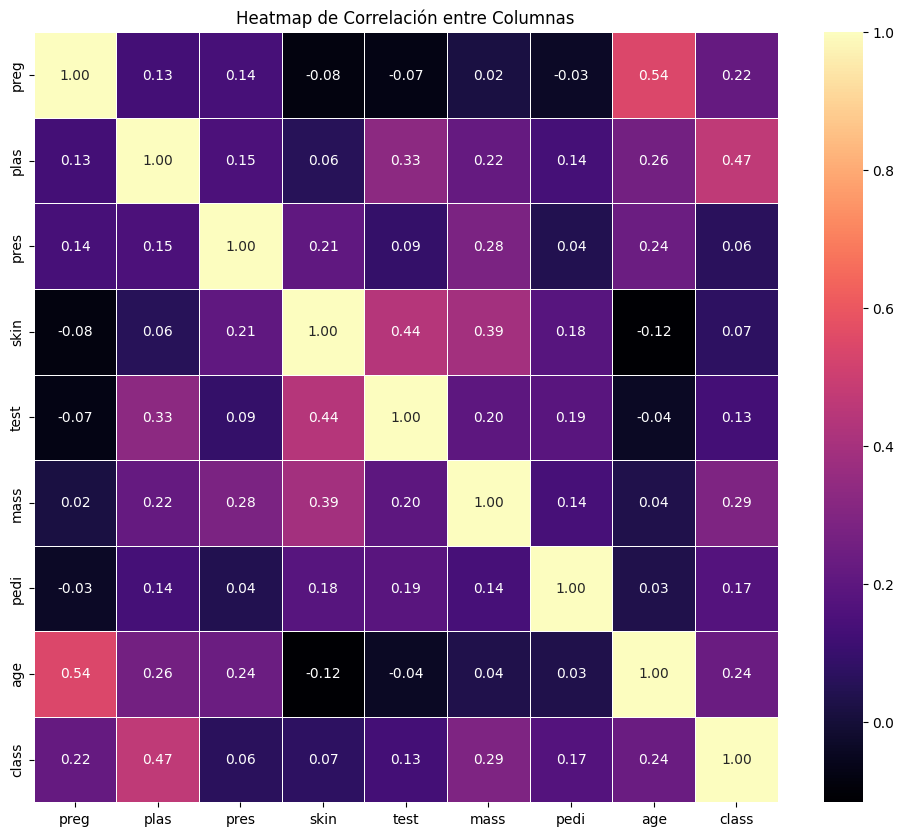

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10)) # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación entre Columnas')
plt.show()

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [13]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]
# Muestra el shape de ambos conjuntos

X = df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]
y = df["class"]
print(X.shape)
print(y.shape)

(767, 8)
(767,)


In [14]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seed
seed = 7

In [ ]:
# Instancia un Decision Tree Classifier

# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado

# Instancia 10 KFolds en la variable kfold

# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [17]:

dt = DecisionTreeClassifier(max_depth=5, random_state=seed)
bc = BaggingClassifier(estimator= dt, n_estimators=100, random_state=seed)
dt2 = DecisionTreeClassifier(max_depth=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

bagging_cv_scores = cross_val_score(
    estimator=bc,
    X=X,
    y=y,
    cv=kfold,
    scoring='accuracy')


In [18]:
# Obtén la media del cross validation score para el Bagging Classifier
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >

In [19]:
print(f"\nPrecisión media: {bagging_cv_scores.mean():.4f}")
print(f"Desviación estándar de la precisión: {bagging_cv_scores.std():.4f}")


Precisión media: 0.7562
Desviación estándar de la precisión: 0.0615


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [24]:
rf = RandomForestClassifier(max_features=3)

In [25]:


rf_scores = cross_val_score(
    estimator=rf,
    X=X,
    y=y,
    cv=kfold,
    scoring='accuracy')

In [ ]:
# Obtén la media del cross validation score para el Random Forest Classifier

In [26]:
rf_scores.mean()

np.float64(0.753673957621326)

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Instancia un AdaBoost Classifier con 30 árboles y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del AdaBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [29]:
abc = AdaBoostClassifier(estimator=dt,
                            n_estimators=30,
                            random_state= seed)

abc_scores = cross_val_score(
    estimator=abc,
    X=X,
    y=y,
    cv=kfold,
    scoring='accuracy')




In [ ]:
# Obtén la media del cross validation score para el AdaBoost Classifier

In [30]:
abc_scores.mean()

np.float64(0.7340567327409433)

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Instancia un GradientBoosting Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del GradientBoosting Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [33]:
gbb = GradientBoostingClassifier(n_estimators=100,
                                random_state=seed,
                                )
gbb_score = cross_val_score(estimator=gbb,
    X=X,
    y=y,
    cv=kfold,
    scoring='accuracy')

In [ ]:
# La misma vaina que estamos haciendo, saca el mean() de la variable del cross_validation

In [35]:
gbb_score.mean()

np.float64(0.7509569377990432)

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
# Descomenta la siguiente wea (palabra chilena, no es ningun termino de Machine Learning) para instalar el XGBoost

In [36]:
!pip install xgboost

In [37]:
from xgboost import XGBClassifier

In [ ]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

In [41]:
xgb = XGBClassifier(n_estimators= 100, random_state= seed)

xgb_score = cross_val_score(estimator=xgb,
                            X=X,
                            y=y,
                            cv=kfold,
                            scoring="accuracy")


In [ ]:
# la mean de la wea que acabamos de hacer

In [42]:
xgb_score.mean()

np.float64(0.7275461380724539)

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [43]:
result = [bagging_cv_scores.mean(), rf_scores.mean(), abc_scores.mean(), gbb_score.mean(), xgb_score.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Bagging DT          0.756203
Random Forest       0.753674
GradientBoosting    0.750957
Ada Boost           0.734057
XGBoost             0.727546
dtype: float64

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test